In [1]:
#24MAI0114- ABHAYNATHK
# Importing required libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB  # As continuous dataset is given 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pylab as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Reading data

data = pd.read_csv(r"D:\VIT\AI ML\Dataset\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df= data.copy()

In [4]:
df.shape
#24MAI0114- ABHAYNATHK

(768, 9)

In [5]:
# Columns of dataset

#df.columns
df.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
#24MAI0114- ABHAYNATHK
# Checking the datatypes

df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
# Checking the duplicate Records

df.duplicated().sum()

0

In [8]:
#24MAI0114- ABHAYNATHK
# Checking the basic information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
#24MAI0114- ABHAYNATHK
# Description of data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [56]:
#24MAI0114- ABHAYNATHK
print("                                              #24MAI0114- ABHAYNATHK")
from skimpy import skim

skim(df)

                                              #24MAI0114- ABHAYNATHK


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 768    │ │ float64     │ 6     │                                                          │
│ │ Number of columns │ 9      │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Pregnancies            │   0 │     0 │   3.845 │   3.37 │     0 │      1 │      3 │      6 │   17 │  ▇▅▃▁  │  │
│ │ Glucose                │   0 │     0 │   121.7 │  30.44 │    44 │  99.75 │    117 │  140.2 │  199 │  ▅▇▆▃▂ │  │
│ │ BloodPressure          │   0 │     0 │   72.25 │  12.12 │    24 │     64 │     72 │     80 │  122 │  ▁▇▇▁  │  │
│ │ SkinThickness          │   0 │     0 │   26.61 │  9.631 │     7 │  20.54 │     23 │     32 │   99 │  ▇▆▂   │  │
│ │ Insulin                │   0 │     0 │   118.7 │  93.08 │    14 │   79.8 │   79.8 │  127.2 │  846 │   ▇▁   │  │
│ │ BMI                    │   0 │     0 │   32.45 │  6.875 │  18.2 │   27.5 │     32 │   36.6 │ 67.1 │  ▃▇▅▁  │  │
│ │ DiabetesPedigreeFuncti │   0 │     0 │  0.4719 │ 0.3313 │ 0.078 │ 0.2437 │ 0.3725 │ 0.6262 │ 2.42 │  ▇▃▁   │  │
│ │ on                     │     │       │         │        │       │        │        │        │      │        │  │
│ │ Age                    │   0 │     0 │   33.24 │  11.76 │    21 │     24 │     29 │     41 │   81 │  ▇▃▂▁  │  │
│ │ Outcome                │   0 │     0 │   0.349 │  0.477 │     0 │      0 │      0 │      1 │    1 │ ▇    ▅ │  │
│ └────────────────────────┴─────┴───────┴─────────┴────────┴───────┴────────┴────────┴────────┴──────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [13]:
#24MAI0114- ABHAYNATHK
df.shape[0]

768

In [14]:
#24MAI0114- ABHAYNATHK
zero_features = ['Glucose','BloodPressure','SkinThickness',"Insulin",'BMI']
total_count = df['Glucose'].count()

for feature in zero_features:
    zero_count = df[df[feature]==0][feature].count()
    print('Number of cases of 0 in {0} is {1}, Percentage is {2:.2f} %'.format(feature, zero_count, zero_count*100/total_count))

Number of cases of 0 in Glucose is 5, Percentage is 0.65 %
Number of cases of 0 in BloodPressure is 35, Percentage is 4.56 %
Number of cases of 0 in SkinThickness is 227, Percentage is 29.56 %
Number of cases of 0 in Insulin is 374, Percentage is 48.70 %
Number of cases of 0 in BMI is 11, Percentage is 1.43 %


In [15]:
#24MAI0114- ABHAYNATHK
df_mean = df[zero_features].mean()
df[zero_features] = df[zero_features].replace(0, df_mean)

In [16]:
#24MAI0114- ABHAYNATHK
df_mean

Glucose          120.894531
BloodPressure     69.105469
SkinThickness     20.536458
Insulin           79.799479
BMI               31.992578
dtype: float64

In [60]:
print("                                             #24MAI0114- ABHAYNATHK")
skim(df)

                                             #24MAI0114- ABHAYNATHK


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 768    │ │ float64     │ 6     │                                                          │
│ │ Number of columns │ 9      │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Pregnancies            │   0 │     0 │   3.845 │   3.37 │     0 │      1 │      3 │      6 │   17 │  ▇▅▃▁  │  │
│ │ Glucose                │   0 │     0 │   121.7 │  30.44 │    44 │  99.75 │    117 │  140.2 │  199 │  ▅▇▆▃▂ │  │
│ │ BloodPressure          │   0 │     0 │   72.25 │  12.12 │    24 │     64 │     72 │     80 │  122 │  ▁▇▇▁  │  │
│ │ SkinThickness          │   0 │     0 │   26.61 │  9.631 │     7 │  20.54 │     23 │     32 │   99 │  ▇▆▂   │  │
│ │ Insulin                │   0 │     0 │   118.7 │  93.08 │    14 │   79.8 │   79.8 │  127.2 │  846 │   ▇▁   │  │
│ │ BMI                    │   0 │     0 │   32.45 │  6.875 │  18.2 │   27.5 │     32 │   36.6 │ 67.1 │  ▃▇▅▁  │  │
│ │ DiabetesPedigreeFuncti │   0 │     0 │  0.4719 │ 0.3313 │ 0.078 │ 0.2437 │ 0.3725 │ 0.6262 │ 2.42 │  ▇▃▁   │  │
│ │ on                     │     │       │         │        │       │        │        │        │      │        │  │
│ │ Age                    │   0 │     0 │   33.24 │  11.76 │    21 │     24 │     29 │     41 │   81 │  ▇▃▂▁  │  │
│ │ Outcome                │   0 │     0 │   0.349 │  0.477 │     0 │      0 │      0 │      1 │    1 │ ▇    ▅ │  │
│ └────────────────────────┴─────┴───────┴─────────┴────────┴───────┴────────┴────────┴────────┴──────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Segragating the features(Independent variables) and Labels (Dependent Variables)

In [20]:
#24MAI0114- ABHAYNATHK
x = df.drop(columns='Outcome')

In [21]:
y= df.Outcome

In [22]:
#Train-Test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=30)

Scaling dataset

In [24]:
#24MAI0114- ABHAYNATHK
scaler = StandardScaler()

In [25]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [26]:
#24MAI0114- ABHAYNATHK
#To check multicolinearity between independent features
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_test_scaled, i) for i in range(x_test_scaled.shape[1])]
vif['Features'] = x.columns

# Let's check the status
vif

,vif,Features
0,1.596899,Pregnancies
1,1.333371,Glucose
2,1.416792,BloodPressure
3,1.454128,SkinThickness
4,1.354222,Insulin
5,1.437099,BMI
6,1.043951,DiabetesPedigreeFunction
7,1.818681,Age


In [27]:
#24MAI0114- ABHAYNATHK
naive_bayes = GaussianNB()
naive_bayes.fit(x_train_scaled, y_train)

GaussianNB()

Pickling

In [28]:
#24MAI0114- ABHAYNATHK
# Saving model to pickle file

import pickle

with open("Diabetes_NB.pkl", "wb") as f:
    pickle.dump(naive_bayes, f)

In [29]:
## Loading model from pickle file

model_nb = pickle.load(open('Diabetes_NB.pkl', 'rb'))

In [30]:
y_pred = model_nb.predict(x_test_scaled)

In [31]:
#24MAI0114- ABHAYNATHK
from sklearn.metrics import accuracy_score


print(f'Training score of the model is : {round(model_nb.score(x_train_scaled, y_train),3)*100} %')
print(f'Accuracy Score of Naive Bayes model is : {round(accuracy_score(y_test, y_pred),4)*100} %')

Training score of the model is : 74.8 %
Accuracy Score of Naive Bayes model is : 77.08 %


In [32]:
#24MAI0114- ABHAYNATHK
#Roc-auc score

from sklearn.metrics import roc_auc_score


y_train_predict_roc = model_nb.predict_proba(x_train_scaled)
print("Naive Bayes model's training roc-auc score is : {}%".format(round(roc_auc_score(y_train, y_train_predict_roc[:,1])*100)))
y_test_predict_roc = model_nb.predict_proba(x_test_scaled)
print("Naive Bayes model's roc-auc accuracy score is : {}%".format(round(roc_auc_score(y_test, y_test_predict_roc[:,1])*100)))

Naive Bayes model's training roc-auc score is : 81%
Naive Bayes model's roc-auc accuracy score is : 82%


In [33]:
#24MAI0114- ABHAYNATHK
#Confusion_matrix
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[112,  18],
       [ 26,  36]], dtype=int64)

In [34]:
#24MAI0114- ABHAYNATHK
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
print('True Positive:',true_positive, '\nTrue Negative:',true_negative, '\nFalse Negative:',false_negative, '\nFalse Positive:',false_positive)

True Positive: 112 
True Negative: 36 
False Negative: 26 
False Positive: 18


Accuracy


It is the metric to evaluate how correcct the model is to predict the values.
Accuracy = (Number of correct predictions) / (Total number of predictions)

In [35]:
#24MAI0114- ABHAYNATHK
# Calculating the Accuracy

Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
print(f'Accuracy of NaiveBayes model using confusion matrix is: {round(Accuracy,4)*100}%')

Accuracy of NaiveBayes model using confusion matrix is: 77.08%


Precision

In [36]:
# Calculating Precision 

precision = true_positive/(true_positive+false_positive)
print(f'Precision score of NaiveBayes model is: {round(precision,4)*100}%')

Precision score of NaiveBayes model is: 86.15%


In [37]:
#24MAI0114- ABHAYNATHK
# Calculating Recall 

recall = true_positive/(true_positive+false_negative)
print(f'Recall score of NaiveBayes model is: {round(recall,4)*100}%')

Recall score of NaiveBayes model is: 81.16%


In [38]:
# F1 score

F1_score = 2*(recall * precision)/(recall + precision)
print(f'F1_score score of NaiveBayes model is: {round(F1_score,4)*100}%')

F1_score score of NaiveBayes model is: 83.58%


In [39]:
#24MAI0114- ABHAYNATHK
from sklearn.metrics import classification_report

class_reprt_naive_bayes = classification_report(y_test, y_pred)
print(class_reprt_naive_bayes)

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       130
           1       0.67      0.58      0.62        62

    accuracy                           0.77       192
   macro avg       0.74      0.72      0.73       192
weighted avg       0.76      0.77      0.77       192



24MAI0114 ABHAYNATH K
 ConfusionMatrixDisplay


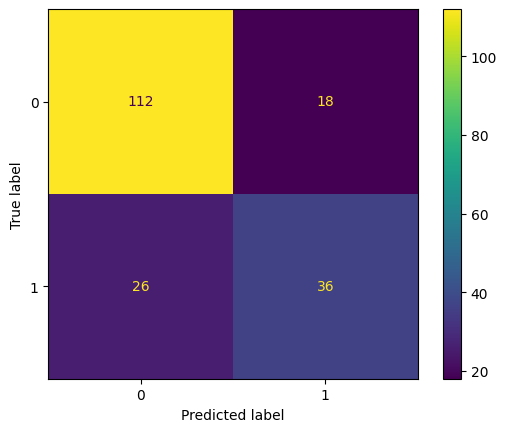

<Figure size 500x500 with 0 Axes>

In [46]:
#24MAI0114- ABHAYNATHK
from sklearn.metrics import ConfusionMatrixDisplay

# Generate the confusion matrix
print("24MAI0114 ABHAYNATH K\n ConfusionMatrixDisplay")
cm = ConfusionMatrixDisplay.from_estimator(model_nb, x_test_scaled, y_test)

# Show the plot
plt.figure(figsize=(5,5))

plt.show()


AUC
AUC determines which model(Logistic Regression/SVM/clustering) is the best(with highest AUC value) for classification problem.

In [47]:
#24MAI0114- ABHAYNATHK
auc = roc_auc_score(y_test, y_pred)
print(f'AUC score of NaiveBayes model is: {round(auc,4)*100}%')

AUC score of NaiveBayes model is: 72.11%


ROC


ROC curve is the graphical representation with respect to True Positive Rate and False Positive Rate. If the curve is closure to the top left corner then model performance is better and the closure to the 45 degree line, model is less accurate.

In [48]:
#24MAI0114- ABHAYNATHK
#Plotting of AUC-ROC Curve
fpr, tpr, threshold = roc_curve(y_test, y_pred)

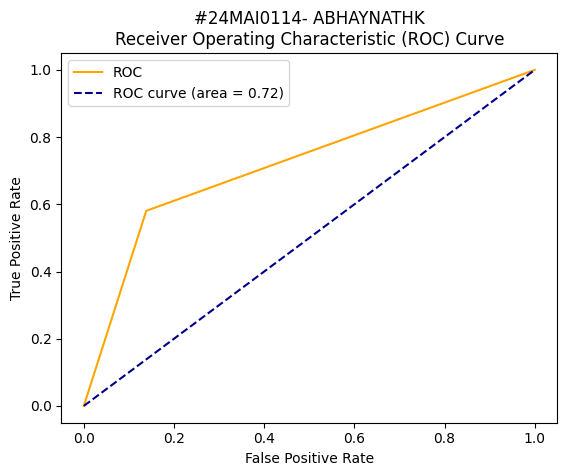

In [51]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('#24MAI0114- ABHAYNATHK\nReceiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()